In [1]:
from kcatbench import kcat_plotting
from kcatbench.util import DATA_DIR
from pathlib import Path
import pandas as pd

In [2]:
dlkcat_data_file = DATA_DIR / "results" / "dlkcat_brenda_test5.tsv"

dlkcat_data = pd.read_csv(dlkcat_data_file, sep="\t")

In [3]:
print(dlkcat_data.head())
print(dlkcat_data.describe())

  Substrate Name Substrate SMILES  \
0          1.1.1              CCO   
1          1.1.1    CCC[C@@H](C)O   
2          1.1.1     CC[C@@H](C)O   
3          1.1.1         CCC(O)CC   
4          1.1.1     CCC[C@H](C)O   

                                    Protein Sequence  Kcat value (1/s)  
0  MRAIVLERFGIENIKIEDIDDESPGIPVKITMAGLNPVDYSTVNGN...          234.4663  
1  MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...            2.4721  
2  MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...            2.4967  
3  MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...            2.4054  
4  MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...            2.4721  
       Kcat value (1/s)
count      12544.000000
mean         170.515948
std         2640.716287
min            0.000000
25%            1.444350
50%            5.566000
75%           20.214000
max       107977.932200


In [4]:
catapro_data_file = DATA_DIR / "results" / "catapro_brenda_linear.csv"

catapro_data = pd.read_csv(catapro_data_file)

In [5]:
print(catapro_data.head())
print(catapro_data.shape)

   Unnamed: 0.1  Unnamed: 0         fasta_id         smiles  \
0             0           0  1.1.1_wild type            CCO   
1             1           1  1.1.1_wild type  CCC[C@@H](C)O   
2             2           2  1.1.1_wild type   CC[C@@H](C)O   
3             3           3  1.1.1_wild type       CCC(O)CC   
4             4           4  1.1.1_wild type   CCC[C@H](C)O   

   pred_log10[kcat(s^-1)]  kcat_catapro  
0                0.292537      1.961267  
1                0.358418      2.282535  
2                0.571211      3.725726  
3                0.552429      3.568035  
4                0.333108      2.153320  
(12663, 6)


In [6]:
unikp_data_file = DATA_DIR / "results" / "unikp_brenda_01.csv"

unikp_data = pd.read_csv(unikp_data_file)

In [7]:
print(unikp_data.head())
print(unikp_data.shape)

     value        parameter       substrate                    organism  \
0  0.00086  turnover_number         ethanol        Picrophilus torridus   
1  1.10000  turnover_number  (R)-2-pentanol  Saccharolobus solfataricus   
2  1.00000  turnover_number   (R)-2-butanol  Saccharolobus solfataricus   
3  1.50000  turnover_number      3-Pentanol  Saccharolobus solfataricus   
4  2.60000  turnover_number  (S)-2-pentanol  Saccharolobus solfataricus   

  Enzyme_id superkingdom         Smiles  \
0     1.1.1      Archaea            CCO   
1     1.1.1      Archaea  CCC[C@@H](C)O   
2     1.1.1      Archaea   CC[C@@H](C)O   
3     1.1.1      Archaea       CCC(O)CC   
4     1.1.1      Archaea   CCC[C@H](C)O   

                                            Sequence  Pred_log10_kcat  \
0  MRAIVLERFGIENIKIEDIDDESPGIPVKITMAGLNPVDYSTVNGN...         0.870835   
1  MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...         0.477968   
2  MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...         0.422814  

In [8]:
dlkcat_data = dlkcat_data[['Substrate SMILES', 'Protein Sequence', 'Kcat value (1/s)']].rename(columns={'Substrate SMILES': 'sub_smiles', 'Protein Sequence': 'sequence', 'Kcat value (1/s)': 'dlkcat_kcat'})
catapro_data = catapro_data[['kcat_catapro']].rename(columns={'kcat_catapro': 'catapro_kcat'})
unikp_data = unikp_data[['value', 'Pred_kcat']].rename(columns={'value': 'experimental_kcat','Pred_kcat': 'unikp_kcat'})
kcat_data = pd.concat([dlkcat_data, catapro_data, unikp_data], axis=1)

In [9]:
print(kcat_data.head())
print(kcat_data.shape)

      sub_smiles                                           sequence  \
0            CCO  MRAIVLERFGIENIKIEDIDDESPGIPVKITMAGLNPVDYSTVNGN...   
1  CCC[C@@H](C)O  MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...   
2   CC[C@@H](C)O  MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...   
3       CCC(O)CC  MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...   
4   CCC[C@H](C)O  MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...   

   dlkcat_kcat  catapro_kcat  experimental_kcat  unikp_kcat  
0     234.4663      1.961267            0.00086    7.427365  
1       2.4721      2.282535            1.10000    3.005857  
2       2.4967      3.725726            1.00000    2.647367  
3       2.4054      3.568035            1.50000    3.229211  
4       2.4721      2.153320            2.60000    3.227584  
(12663, 6)


In [10]:
# kcat_plotting.plot_model_comparison(kcat_data, 'dlkcat_kcat', 'catapro_kcat', 'DLKcat', 'CataPro', log_scale=True, save=True, gridsize=70)
# kcat_plotting.plot_model_comparison(kcat_data, 'dlkcat_kcat', 'unikp_kcat', 'DLKcat', 'UniKP', log_scale=True, save=True, gridsize=70)
# kcat_plotting.plot_model_comparison(kcat_data, 'catapro_kcat', 'unikp_kcat', 'CataPro', 'UniKP', log_scale=True, save=True, gridsize=70)
# kcat_plotting.plot_model_comparison(kcat_data, 'experimental_kcat', 'dlkcat_kcat', 'Experimental', 'DLKcat', log_scale=True, save=True, gridsize=70)
# kcat_plotting.plot_model_comparison(kcat_data, 'experimental_kcat', 'catapro_kcat', 'Experimental', 'CataPro', log_scale=True, save=True, gridsize=70)
# kcat_plotting.plot_model_comparison(kcat_data, 'experimental_kcat', 'unikp_kcat', 'Experimental', 'UniKP', log_scale=True, save=True, gridsize=70)

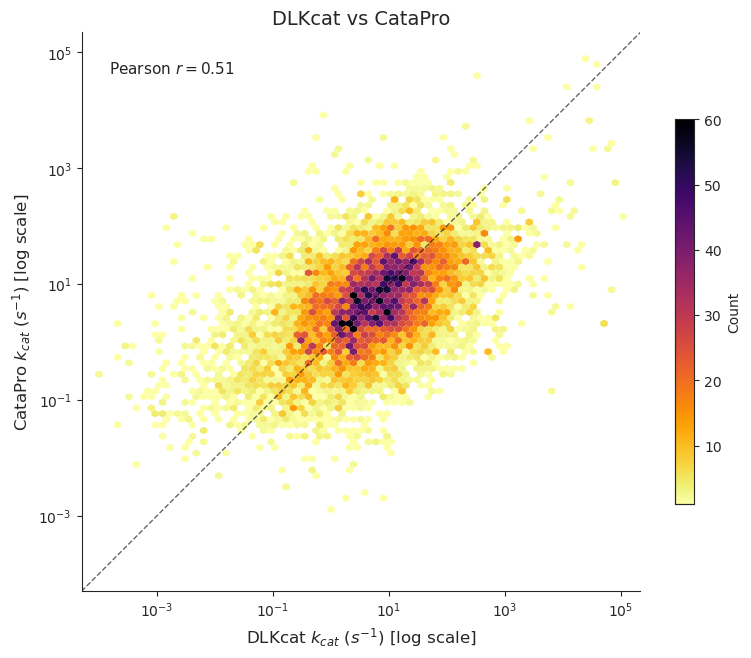

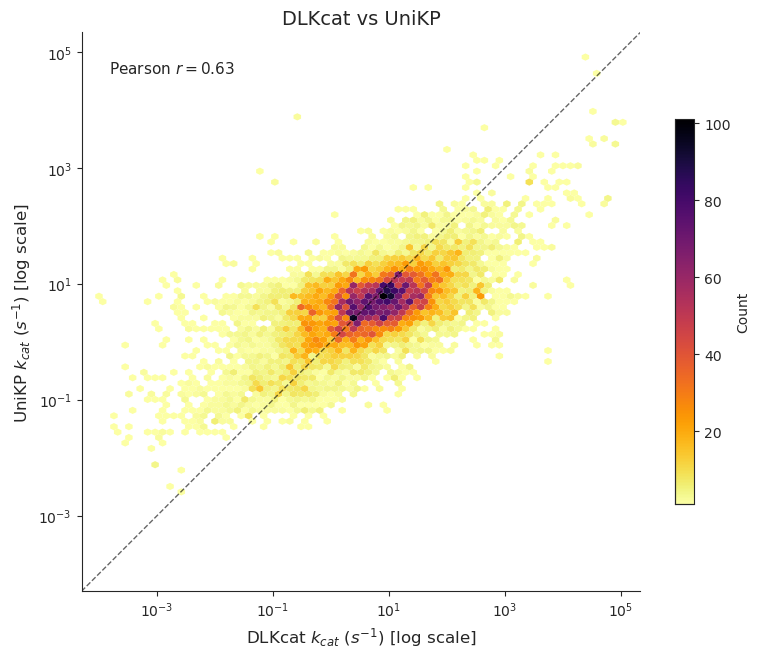

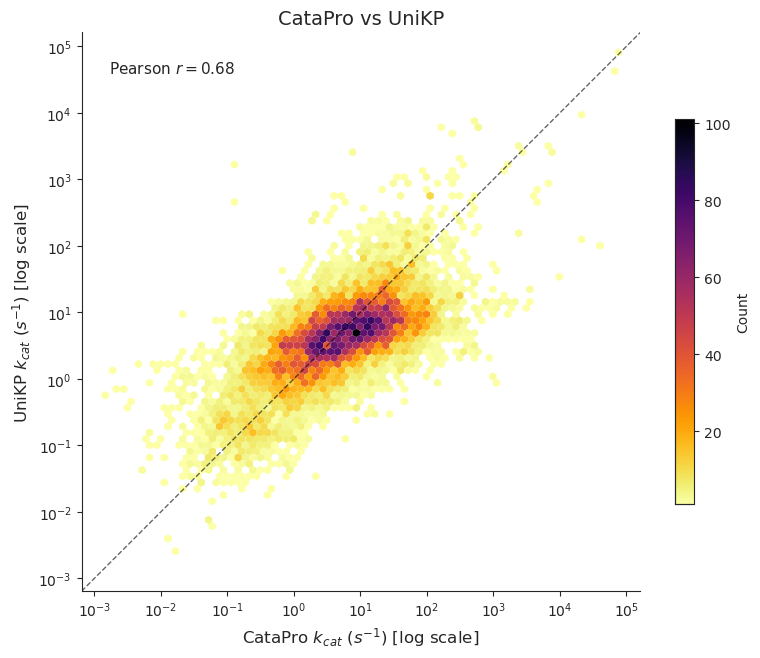

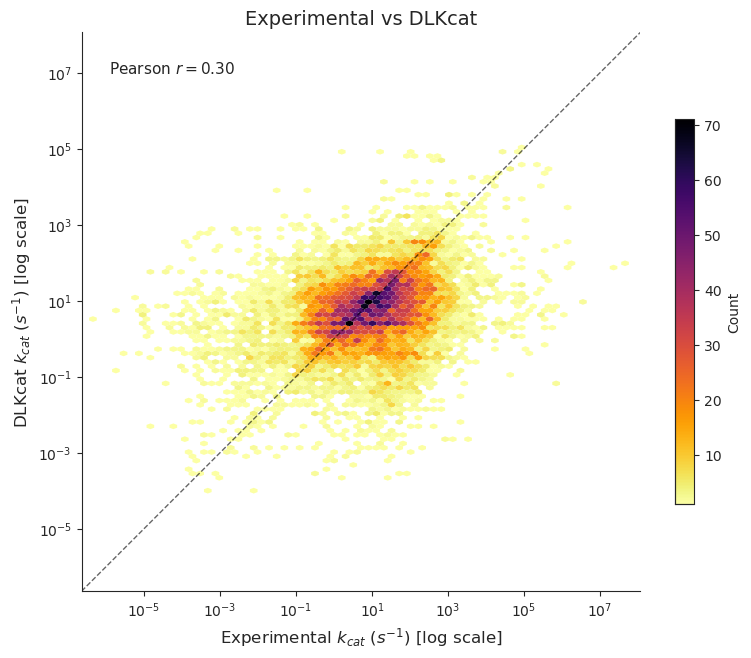

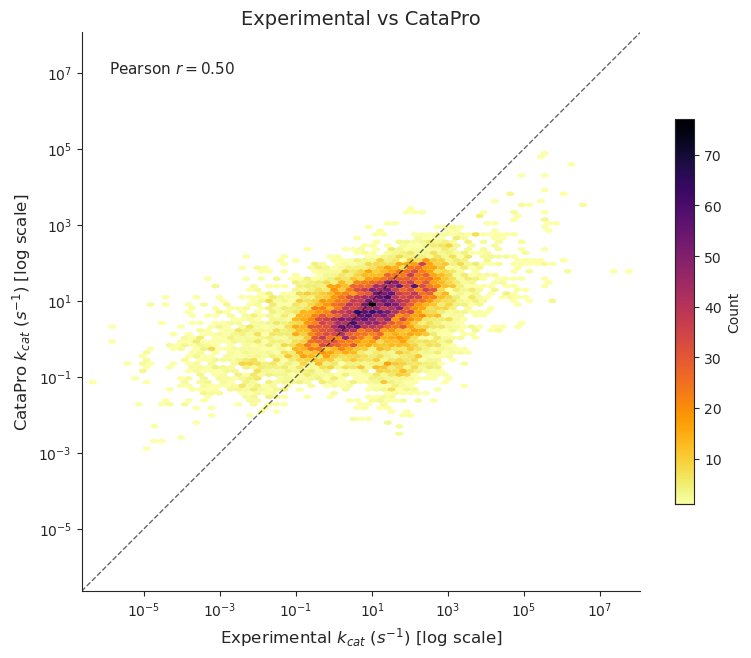

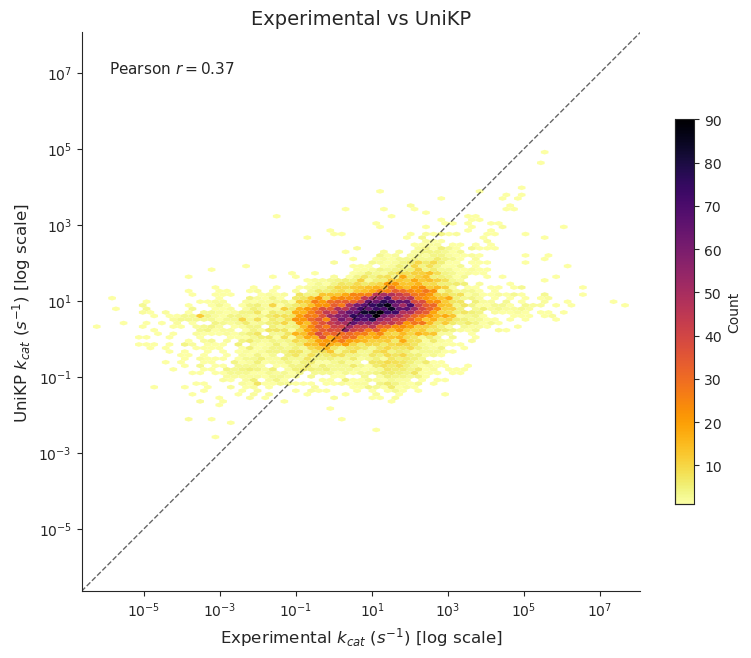

In [11]:
kcat_plotting.plot_model_comparison(kcat_data, 'dlkcat_kcat', 'catapro_kcat', 'DLKcat', 'CataPro', log_scale=True, save=True, gridsize=70)
kcat_plotting.plot_model_comparison(kcat_data, 'dlkcat_kcat', 'unikp_kcat', 'DLKcat', 'UniKP', log_scale=True, save=True, gridsize=70)
kcat_plotting.plot_model_comparison(kcat_data, 'catapro_kcat', 'unikp_kcat', 'CataPro', 'UniKP', log_scale=True, save=True, gridsize=70)
kcat_plotting.plot_model_comparison(kcat_data, 'experimental_kcat', 'dlkcat_kcat', 'Experimental', 'DLKcat', log_scale=True, save=True, gridsize=70)
kcat_plotting.plot_model_comparison(kcat_data, 'experimental_kcat', 'catapro_kcat', 'Experimental', 'CataPro', log_scale=True, save=True, gridsize=70)
kcat_plotting.plot_model_comparison(kcat_data, 'experimental_kcat', 'unikp_kcat', 'Experimental', 'UniKP', log_scale=True, save=True, gridsize=70)